# Identificación de integrantes

+ Sebastian Rivera
+ Cristobal Novoa
+ Brandon Cameron

# Carga de librerías

In [2]:
# Escriba su código acá
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import datetime

plt.rcParams["figure.figsize"] = (12,5)

# Carga de set de datos

In [3]:
df_weather = pd.read_csv("weatherAUS.csv")
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
print("El dataset presenta {0} observaciones considerando {1} variables".format(df_weather.shape[0], df_weather.shape[1]))

El dataset presenta 142193 observaciones considerando 24 variables


In [5]:
df_weather.columns = pd.DataFrame(df_weather.columns)[0].apply(lambda x : x.lower()).values
df_weather.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'risk_mm', 'raintomorrow'],
      dtype='object')

In [6]:
df_weather.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,risk_mm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


# Preguntas

### 1.- Conocer la variación de temperatura maxima de cada mes de un año seleccionado, respecto a cada una de las ciudades

### 2.- Conocer el promedio de lluvia en un año en cada ciudad 

### 3.- Conocer el promeido de rafaga de viento respecto al nivel de lluvia

### 4.- Conocer la o las ciudades que presenten nivel de humedad de las 3 pm superior al promedio

# Pregunta 1

##### 1.- Conocer la variación de temperatura maxima de cada mes de un año seleccionado, respecto a cada una de las ciudades

## Limpieza y transformación de la/las columnas involucradas en la pregunta

##### Columnas : "date", "location", "maxtemp"

In [7]:
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather2 = df_weather.set_index('date')
df_weather2.head()

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,risk_mm,raintomorrow
date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [79]:
print("La columna location presenta una cantidad de {0} valores unicos".format(df_weather2['location'].nunique()))

La columna location presenta una cantidad de 49 valores unicos


+ Dado que la columna Location presenta 49 valores unicos, se toma la desición de realizar la transformación de la columna con LabelEncoder(). Esto es porque al usar OneHotEncoder() se crearán las columnas respectivas para cada uno de los valores unicos presentes en location

In [77]:
encoder = LabelEncoder()
variable = df_weather2['location']
variable

date
2008-12-01    Albury
2008-12-02    Albury
2008-12-03    Albury
2008-12-04    Albury
2008-12-05    Albury
               ...  
2017-06-20     Uluru
2017-06-21     Uluru
2017-06-22     Uluru
2017-06-23     Uluru
2017-06-24     Uluru
Name: location, Length: 142193, dtype: object

In [72]:
variable_transformada = encoder.fit_transform(variable)
variable_transformada

array([ 2,  2,  2, ..., 41, 41, 41])

In [78]:
df_transformada = df_weather2.copy()
df_transformada.insert(1, 'location_transformada', variable_transformada)
df_transformada.head()

,location,location_transformada,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,risk_mm,raintomorrow
date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,2,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
2008-12-02,Albury,2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2008-12-03,Albury,2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
2008-12-04,Albury,2,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
2008-12-05,Albury,2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [9]:
print("La columna maxtemp presenta {0} valores nulos".format(df_weather.maxtemp.isnull().sum()))
print("La columna location presenta {0} valores nulos".format(df_weather.location.isnull().sum()))
print("La columna date presenta {0} valores nulos".format(df_weather.index.isnull().sum()))

La columna maxtemp presenta 322 valores nulos
La columna location presenta 0 valores nulos
La columna date presenta 0 valores nulos


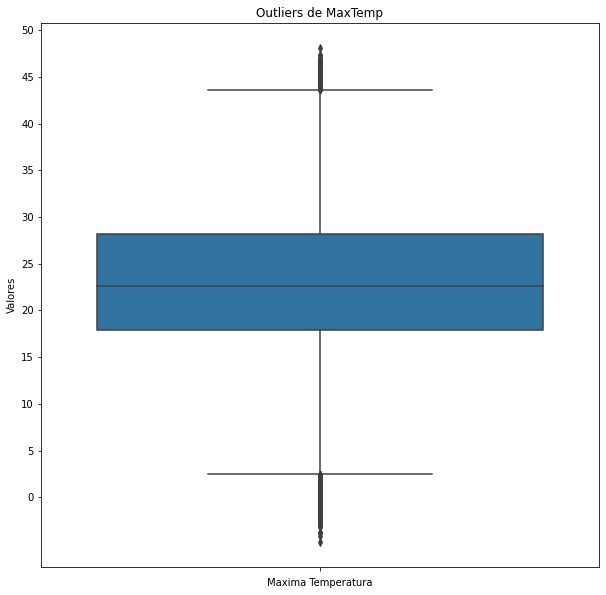

In [10]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df_weather2.maxtemp, data=df_weather)
plt.xlabel('Maxima Temperatura')
plt.ylabel('Valores')
plt.yticks(range(0,55,5));
plt.title(r'Outliers de MaxTemp');

+ De acuerdo con el gracifo, este muestra que la columna "MaxTemp" presenta valores atipicos, es por esto que la limpieza de los datos nulos se hizo de acuerdo a la Moda de la columna

In [11]:
moda = df_weather2.maxtemp.mode()[0]
df_weather2.maxtemp = df_weather2.maxtemp.fillna(moda)
print("Valores nulos de la columna maxtemp :  {0}".format(df_weather2.maxtemp.isnull().sum()))

Valores nulos de la columna maxtemp :  0


## Análisis exploratorio de la/las columna/as involucradas en la pregunta

### Cálculo e interpretación de las medidas básicas de acuerdo con el tipo de variable

In [12]:
df_weather2['maxtemp'].describe()

count    142193.000000
mean         23.219477
std           7.111209
min          -4.800000
25%          17.900000
50%          22.600000
75%          28.200000
max          48.100000
Name: maxtemp, dtype: float64

+ El promedio de temperatura maxima entre las ciudades es de 23°C
+ El 75% de las ciudades presenta una temperatura maxima igual o inferior a 28°C
+ El 25% de las ciudades presenta una temperatura maxima igual o inferior a 18°C
+ Aproximadamente el 66% de las ciudades presenta una temperatura maxima entre 16°C y 30°C

In [13]:
mean, std = np.mean(df_weather2.maxtemp), np.std(df_weather2.maxtemp)
lim_inf, lim_sup = mean - 2*std, mean + 2*std
print("Extremo inferior {0} - Extremo superior : {1}".format(lim_inf, lim_sup))
analizados = df_weather2.query("maxtemp >= {0} & maxtemp <= {1}".format(lim_inf, lim_sup))['maxtemp'].count()
total = df_weather2.shape[0]
print(analizados/total*100)

Extremo inferior 8.997109479909419 - Extremo superior : 37.44184461769048
96.2178166295106


+ El 96% de los datos tiene una temperatura maxima entre 9°C y 37°C

##### Comprobar medidas

In [14]:
moda = df_weather2.maxtemp.mode()[0]
mediana = df_weather2.maxtemp.median()
media = df_weather2.maxtemp.mean()
print("Moda {0} - Mediana {1} - Media {2}".format(moda, mediana, media))

Moda 20.0 - Mediana 22.6 - Media 23.21947704879995


In [15]:
mean, std = np.mean(df_weather2.maxtemp), np.std(df_weather2.maxtemp)
lim_inf, lim_sup = mean - std, mean + std
print("Intervalo = [{0};{1}]".format(lim_inf, lim_sup))
analizados = df_weather2.query("maxtemp >= {0} & maxtemp <= {1}".format(lim_inf, lim_sup))['maxtemp'].count()
total = df_weather2.shape[0]
print(analizados/total*100)

Intervalo = [16.108293264354685;30.33066083324521]
65.86400174410836


In [16]:
cuartil_tres = np.quantile(df_weather2.maxtemp, 0.75)
print(cuartil_tres)
analizados = df_weather2.query("maxtemp <= {}".format(cuartil_tres))['maxtemp'].count()
total = df_weather2.shape[0]
print(analizados/total*100)

28.2
75.1014466253613


In [17]:
cuartil_uno = np.quantile(df_weather2.maxtemp, 0.25)
print(cuartil_uno)
analizados = df_weather2.query("maxtemp <= {}".format(cuartil_uno))['maxtemp'].count()
total = df_weather2.shape[0]
print(analizados/total*100)

17.9
25.023032076121893


## Respuesta, vía código, a la pregunta

In [18]:
def data(df, annio, ciudad, nombreCol):
    filtro = df[df.index.year == annio]
    filtro_ciudad = filtro[filtro['location'].str.contains(ciudad, case = False)]
    data = pd.DataFrame(filtro_ciudad.groupby([filtro_ciudad.index.month])['maxtemp'].max())
    data.columns = [nombreCol]
    
    return data

ciudad = "Sydney"
annio = 2016

data_1 = data(df_weather2, annio, ciudad, "temperatura_maxima")
data_2 = data_1.assign(temperatura_maxima_anterior = data(df_weather2, annio-1, ciudad, "temperatura_maxima_anterior"))
data_2

,temperatura_maxima,temperatura_maxima_anterior
date,,
1,40.6,36.6
2,37.8,33.1
3,31.7,37.9
4,34.7,32.6
5,28.9,28.6
6,23.1,23.6
7,27.0,21.6
8,26.7,28.9
9,24.9,30.5


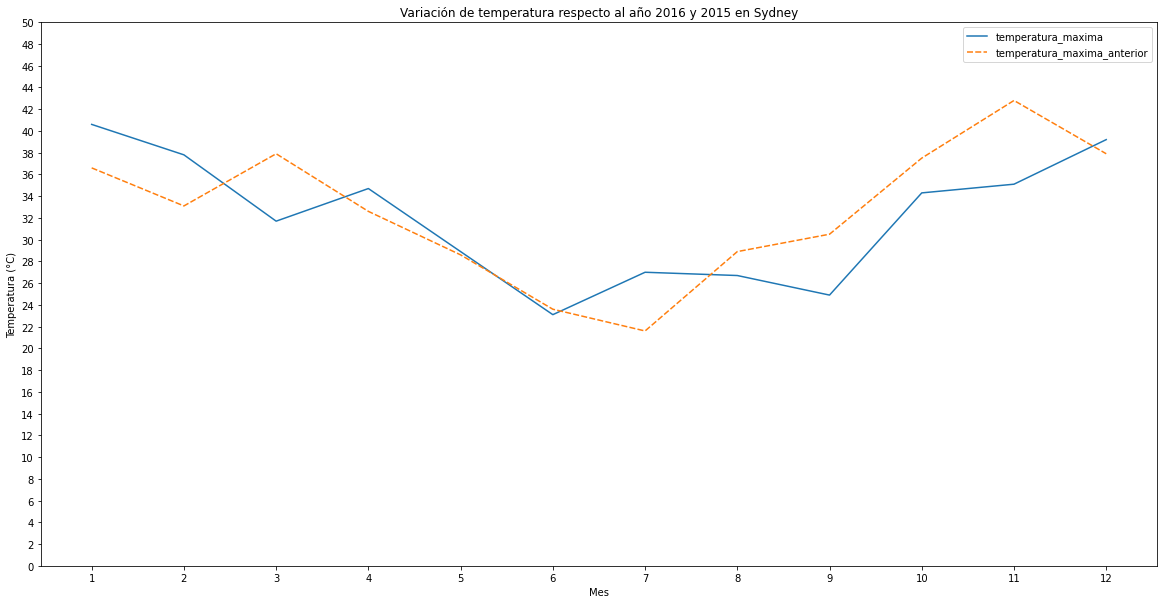

In [19]:
sns.lineplot(data = data_2)
plt.xticks(range(1,13));
plt.yticks(range(0,52,2));
plt.title("Variación de temperatura respecto al año {0} y {1} en {2}".format(annio, annio-1, ciudad))
plt.xlabel("Mes")
plt.ylabel("Temperatura (°C)")
plt.gcf().set_size_inches(20, 10)

## Información y conocimiento útil obtenido (patrones, tendencias)

+ El mes de Mayo del año 2016 presenta la misma temperatura respecto al año anterior
+ El mes de Diciembre del año 2016 varia en 2°C en comparación al año anterior

# Pregunta 2

## Limpieza y transformación de la/las columnas involucradas en la pregunta

**Variables a utilizar:** Location, Date, Rainfall

+ Dado que la columna Location presenta 49 valores unicos, se toma la desición de realizar la transformación de la columna con LabelEncoder(). Esto es porque al usar OneHotEncoder() se crearán las columnas respectivas para cada uno de los valores unicos presentes en location

In [81]:
#Se usará la misma variable encoder creada en la pregunta anterior
variable_pregunta_2 = df_weather2['location']
variable_transfor_pregunta_2 = encoder.fit_transform(variable_pregunta_2)
variable_transfor_pregunta_2

array([ 2,  2,  2, ..., 41, 41, 41])

In [82]:
df_transfor_pregunta_2 = df_weather2.copy()
df_transfor_pregunta_2.insert(1, 'location_transformada', variable_transformada)
df_transfor_pregunta_2.head()

,location,location_transformada,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,risk_mm,raintomorrow
date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,2,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
2008-12-02,Albury,2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2008-12-03,Albury,2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
2008-12-04,Albury,2,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
2008-12-05,Albury,2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [20]:
df_weather2.isnull().sum().sort_values(ascending=False)

sunshine         67816
evaporation      60843
cloud3pm         57094
cloud9am         53657
pressure9am      14014
pressure3pm      13981
winddir9am       10013
windgustdir       9330
windgustspeed     9270
winddir3pm        3778
humidity3pm       3610
temp3pm           2726
windspeed3pm      2630
humidity9am       1774
raintoday         1406
rainfall          1406
windspeed9am      1348
temp9am            904
mintemp            637
risk_mm              0
location             0
maxtemp              0
raintomorrow         0
dtype: int64

In [21]:
print("La columna rainfall presenta {0} valores nulos".format(df_weather2.rainfall.isnull().sum()))
print("La columna location presenta {0} valores nulos".format(df_weather2.location.isnull().sum()))
print("La columna date presenta {0} valores nulos".format(df_weather2.index.isnull().sum()))

La columna rainfall presenta 1406 valores nulos
La columna location presenta 0 valores nulos
La columna date presenta 0 valores nulos


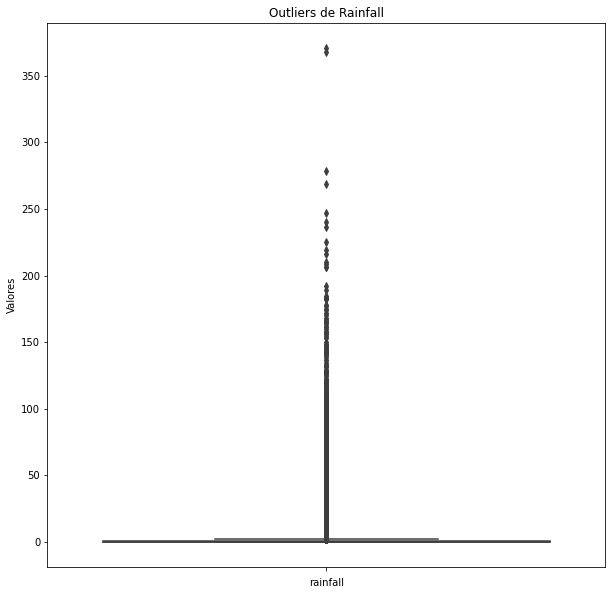

In [22]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df_weather2.rainfall, data=df_weather2)
plt.xlabel('rainfall')
plt.ylabel('Valores')
plt.title(r'Outliers de Rainfall');

In [23]:
# Realiza la imputación
df_weather2.rainfall = df_weather2.rainfall.fillna(df_weather.rainfall.median())
# Verifica la cantidad de nulos
df_weather.rainfall.isnull().sum()
print("Valores nulos de la columna rainfall :  {0}".format(df_weather2.rainfall.isnull().sum()))

Valores nulos de la columna rainfall :  0


## Análisis exploratorio de la/las columna/as involucradas en la pregunta

### Cálculo e interpretación de las medidas básicas de acuerdo con el tipo de variable

In [24]:
df_weather2['rainfall'].describe()

count    142193.000000
mean          2.326738
std           8.426426
min           0.000000
25%           0.000000
50%           0.000000
75%           0.600000
max         371.000000
Name: rainfall, dtype: float64

- El promedio de lluvia caida entre todas las ciudades es de 2.3 ml
- El 75% de las ciudades tiene precipitaciones igual o inferior a 0,6 ml
- La mayor concentracion de datos se encuentra entre los 0 y 10,7 mililitros de lluvia caida


**Comprobacion de medidas**

In [25]:
df_weather2.rainfall.mean()

2.326737603117244

**El promedio de lluvia caida entre todas las ciudades es de 2.3 ml**

In [26]:
mean, std = np.mean(df_weather2.rainfall), np.std(df_weather2.rainfall)
lim_inf, lim_sup = mean - std, mean + std
print("Intervalo = [{0};{1}]".format(lim_inf, lim_sup))
analizados = df_weather2.query("rainfall >= {0} & rainfall <= {1}".format(lim_inf, lim_sup))['rainfall'].count()
total = df_weather2.shape[0]
print(analizados/total*100)

Intervalo = [-6.099658438402475;10.753133644636964]
93.91812536482105


**El 94% de los ciudades presenta precipitaciones entre 0 ml y 10,7 ml**

In [27]:
cuartil_tres = np.quantile(df_weather2.rainfall, 0.75)
print(cuartil_tres)
analizados = df_weather2.query("rainfall <= {}".format(cuartil_tres))['rainfall'].count()
total = df_weather2.shape[0]
print(analizados/total*100)

0.6
75.20412397234745


**El 75% de las ciudades tiene precipitaciones igual o inferior a 0,6 ml**

## Respuesta, vía código, a la pregunta

In [28]:
filtro = df_weather2[df_weather2['location'].str.contains("Albury", case = False)]
data_preg_2 = pd.DataFrame(filtro.groupby([filtro.index.year, 'location'])['rainfall'].mean())
data_preg_2

,,rainfall
date,location,
2008,Albury,1.800000
2009,Albury,1.307692
2010,Albury,2.559777
2011,Albury,2.560606
2012,Albury,2.201796
2013,Albury,1.584384
2014,Albury,1.648889
2015,Albury,1.703014
2016,Albury,2.199454


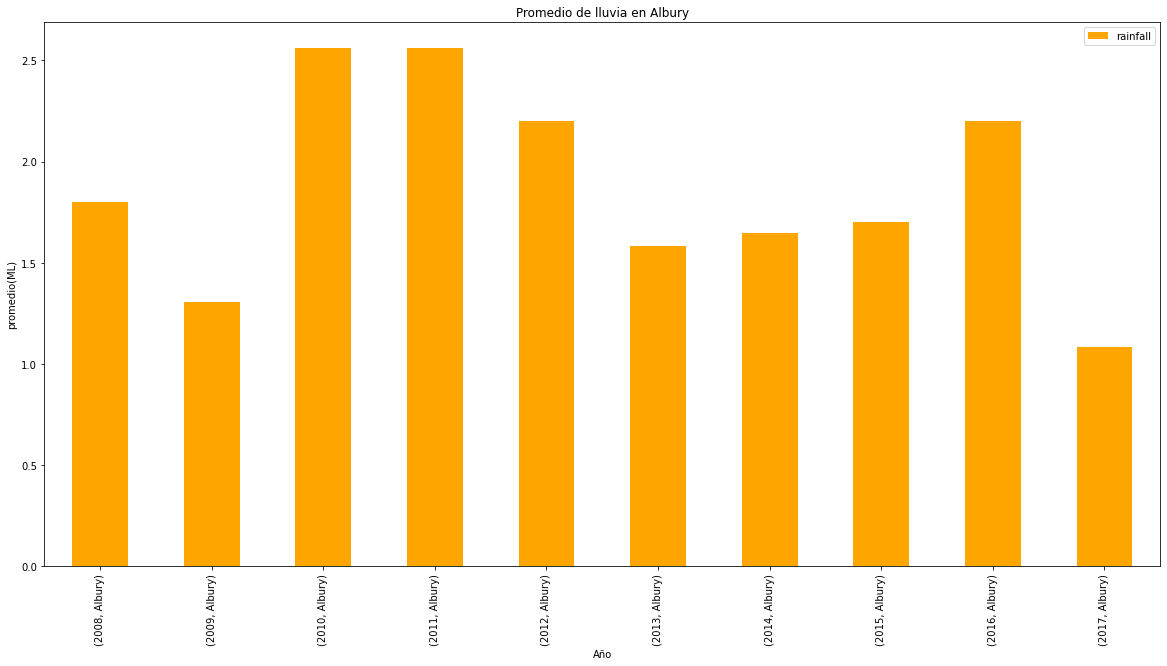

In [29]:
df_promedio = pd.DataFrame(data_preg_2)
df_promedio.plot(kind='bar', title='Promedio de lluvia en Albury', xlabel='Año', ylabel='promedio(ML)', color = ["orange"])
plt.gcf().set_size_inches(20, 10)

## Información y conocimiento útil obtenido (patrones, tendencias)

+ En el año 2017 la ciudad de Albury tuvo la menor cantidad ml de lluvia caidos entre todos los registros
+ En el año 2012 y en el año 2016 el promedio de lluvia caida fue el mismo
+ En el año 2010 y 2011, Albury presento la mayor cantidad de lluvias

# Pregunta 3

## Limpieza y transformación de la/las columnas involucradas en la pregunta

+ Dado que la columna Location presenta 49 valores unicos, se toma la desición de realizar la transformación de la columna con LabelEncoder(). Esto es porque al usar OneHotEncoder() se crearán las columnas respectivas para cada uno de los valores unicos presentes en location

In [83]:
#Se usará la misma variable encoder creada en la pregunta numero 1
variable_pregunta_3 = df_weather2['location']
variable_transfor_pregunta_3 = encoder.fit_transform(variable_pregunta_3)
variable_transfor_pregunta_3

array([ 2,  2,  2, ..., 41, 41, 41])

In [84]:
df_transfor_pregunta_3 = df_weather2.copy()
df_transfor_pregunta_3.insert(1, 'location_transformada', variable_transfor_pregunta_3)
df_transfor_pregunta_3.head()

,location,location_transformada,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,risk_mm,raintomorrow
date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,2,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
2008-12-02,Albury,2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2008-12-03,Albury,2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
2008-12-04,Albury,2,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
2008-12-05,Albury,2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


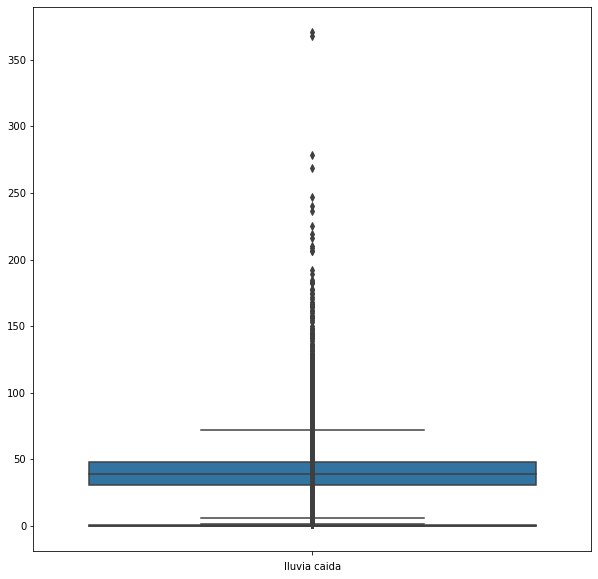

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df_weather2.rainfall, data=df_weather2)
sns.boxplot(y=df_weather2.windgustspeed, data=df_weather2)
plt.xlabel('lluvia caida')
plt.ylabel('')
plt.title(r'');

In [31]:
moda_rain = df_weather2.rainfall.mode()[0]
df_weather2.rainfall = df_weather2.rainfall.fillna(moda_rain)
moda_wind = df_weather2.windgustspeed.mode()[0]
df_weather2.windgustspeed = df_weather2.windgustspeed.fillna(moda_rain)
df_weather2.isnull().sum().sort_values(ascending=True)

location             0
risk_mm              0
windgustspeed        0
raintomorrow         0
maxtemp              0
rainfall             0
mintemp            637
temp9am            904
windspeed9am      1348
raintoday         1406
humidity9am       1774
windspeed3pm      2630
temp3pm           2726
humidity3pm       3610
winddir3pm        3778
windgustdir       9330
winddir9am       10013
pressure3pm      13981
pressure9am      14014
cloud9am         53657
cloud3pm         57094
evaporation      60843
sunshine         67816
dtype: int64

+ Se remplazaron  los nulos de lluvia 'Rainfall' y rafagas de viento 'WindGustSpeed' por la moda ya que asi nos dara una mejor representacion, ya que las columnas presentan valores atipicos

## Análisis exploratorio de la/las columna/as involucradas en la pregunta

### Cálculo e interpretación de las medidas básicas de acuerdo con el tipo de variable

In [32]:
df_weather2['windgustspeed'].describe()

count    142193.000000
mean         37.377592
std          16.433198
min           0.000000
25%          30.000000
50%          37.000000
75%          46.000000
max         135.000000
Name: windgustspeed, dtype: float64

+ El promedio de rafagas de viento entre los años es de 39 k/h
+ El 75% de las rafagas de viento es de 48 k/h
+ El 25% de las rafagas de viento corresponden a 31 k/h

In [33]:
mean, std = np.mean(df_weather2.windgustspeed), np.std(df_weather2.windgustspeed)
lim_inf, lim_sup = mean - std, mean + std
print("Intervalo = [{0};{1}]".format(lim_inf, lim_sup))
analizados = df_weather2.query(" windgustspeed >= {0} & windgustspeed <= {1}".format(lim_inf, lim_sup))['windgustspeed'].count()
total = df_weather2.shape[0]
print(analizados/total*100)

Intervalo = [20.944452515626498;53.810732338761554]
73.64005260455859


In [34]:
cuartil_tres = np.quantile(df_weather2.windgustspeed, 0.75)
print(cuartil_tres)
analizados = df_weather2.query(" windgustspeed <= {}".format(cuartil_tres))['windgustspeed'].count()
total = df_weather2.shape[0]
print(analizados/total*100)

46.0
75.81807824576457


In [35]:
cuartil_uno = np.quantile(df_weather2.windgustspeed, 0.25)
print(cuartil_uno)
analizados = df_weather2.query("windgustspeed <= {}".format(cuartil_uno))['windgustspeed'].count()
total = df_weather2.shape[0]
print(analizados/total*100)

30.0
29.296097557545025


In [36]:
df_weather2['rainfall'].describe()

count    142193.000000
mean          2.326738
std           8.426426
min           0.000000
25%           0.000000
50%           0.000000
75%           0.600000
max         371.000000
Name: rainfall, dtype: float64

- El promedio de lluvia caida entre todas las ciudades es de 2.3 ml
- El 75% de las ciudades tiene precipitaciones igual o inferior a 0,6 ml
- La mayor concentracion de datos se encuentra entre los 0 y 10,7 mililitros de lluvia caida

## Respuesta, vía código, a la pregunta

In [37]:
filtro = df_weather2[df_weather2.index.year == 2016]
filtro_mes = pd.DataFrame(filtro.groupby([filtro.index.month])['windgustspeed'].mean())
filtro_lluvia = pd.DataFrame(filtro.groupby([filtro.index.month])['rainfall'].mean())

data_preg_3 = filtro_mes.assign(rain = filtro_lluvia.rainfall)

data_preg_3

,windgustspeed,rain
date,,
1,38.914542,3.543832
2,38.726077,1.236085
3,35.484642,2.382457
4,34.109484,1.428870
5,36.901726,2.124104
6,35.303486,4.507929
7,38.264725,2.608206
8,36.176238,2.312475
9,37.069945,2.982964


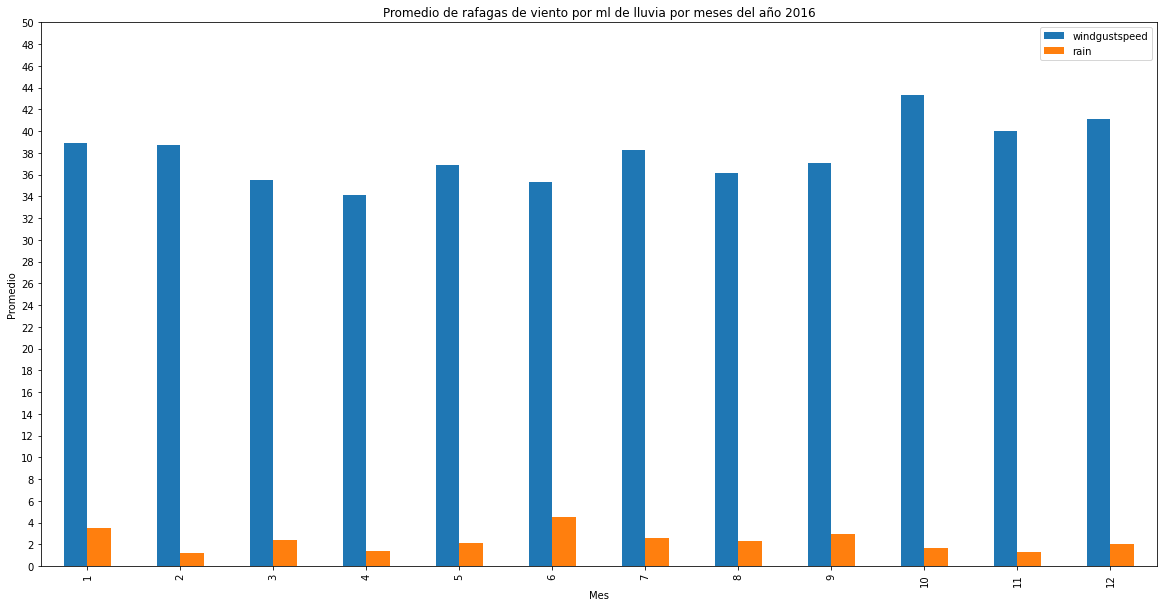

In [38]:
data_preg_3.plot(kind='bar', title='Promedio de rafagas de viento por ml de lluvia por meses del año 2016', xlabel='Mes', ylabel='Promedio')
plt.yticks(range(0,52,2));
plt.gcf().set_size_inches(20, 10)

## Información y conocimiento útil obtenido (patrones, tendencias)

+ Se logro sacar el promedio de lluvia y de rafagas de viento por cada uno de los meses del año 2016, tomando en cuenta esto se puede decir que el mes de junio fue el que mas lluvia cayo, esto concuerda ya que es el mes en que comienza el invierno y las rafagas de viento son mas vareadas debido a que el clima en Australia es muy disperso 
+ los meses en que menos lluvia cayo, son los correspondientes a verano y otoño, aunque en australia el clima no sea parejo, esto concuerda con las estaciones del año
+ Los meses en que se presentaron mas rafagas de viento fueron entre noviembre y febrero

# Pregunta 4

#### 4.- Conocer la o las ciudades que presenten nivel de humedad de las 3 pm superior al promedio

## Limpieza y transformación de la/las columnas involucradas en la pregunta

##### Columnas : "location", "humidity3pm"

+ Dado que la columna Location presenta 49 valores unicos, se toma la desición de realizar la transformación de la columna con LabelEncoder(). Esto es porque al usar OneHotEncoder() se crearán las columnas respectivas para cada uno de los valores unicos presentes en location

In [85]:
#Se usará la misma variable encoder creada en la pregunta numero 1
variable_pregunta_4 = df_weather2['location']
variable_transfor_pregunta_4 = encoder.fit_transform(variable_pregunta_4)
variable_transfor_pregunta_4

array([ 2,  2,  2, ..., 41, 41, 41])

In [86]:
df_transfor_pregunta_4 = df_weather2.copy()
df_transfor_pregunta_4.insert(1, 'location_transformada', variable_transfor_pregunta_4)
df_transfor_pregunta_4.head()

,location,location_transformada,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,risk_mm,raintomorrow
date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,2,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
2008-12-02,Albury,2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2008-12-03,Albury,2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
2008-12-04,Albury,2,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
2008-12-05,Albury,2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [39]:
print("La columna humidity3pm presenta {0} valores nulos".format(df_weather.humidity3pm.isnull().sum()))
print("La columna location presenta {0} valores nulos".format(df_weather.location.isnull().sum()))

La columna humidity3pm presenta 3610 valores nulos
La columna location presenta 0 valores nulos


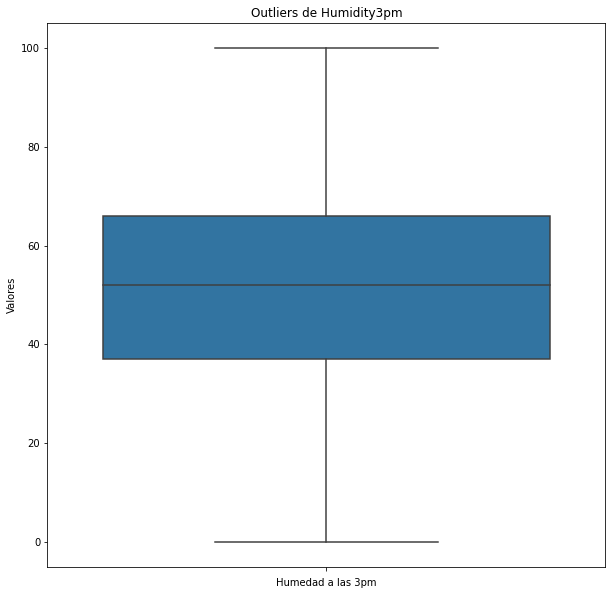

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df_weather2.humidity3pm, data=df_weather2)
plt.xlabel('Humedad a las 3pm')
plt.ylabel('Valores')
plt.title(r'Outliers de Humidity3pm');

+ La columna "humidity3pm" no presenta valores atipicos, es por esto que los valores nulos serán reemplazados por la media de la columna

In [41]:
media = df_weather2.humidity3pm.mean()
df_weather2.humidity3pm = df_weather2.humidity3pm.fillna(media)
print("Valores nulos de la columna humidity3pm :  {0}".format(df_weather2.humidity3pm.isnull().sum()))

Valores nulos de la columna humidity3pm :  0


## Análisis exploratorio de la/las columna/as involucradas en la pregunta

### Cálculo e interpretación de las medidas básicas de acuerdo con el tipo de variable

In [42]:
df_weather2['humidity3pm'].describe()

count    142193.000000
mean         51.482606
std          20.532065
min           0.000000
25%          37.000000
50%          51.482606
75%          65.000000
max         100.000000
Name: humidity3pm, dtype: float64

+ El promedio de humedad a las 3pm entre todas las ciudades de Australia es de 51%

+ Aprximadamente el 68% de las ciudades tienen un nivel humedad a las 3pm entre 31% y 72%

+ EL 75% de las ciudades presenta un nivel de humedad a las 3pm igual o inferior a 65%

+ El 25% de las ciudades presenta un nivel de humedad a las 3 pm igual o inferior a 37%

In [43]:
mean, std = np.mean(df_weather2.humidity3pm), np.std(df_weather2.humidity3pm)
lim_inf, lim_sup = mean - 2*std, mean + 2*std
print("Extremo inferior {0} - Extremo superior : {1}".format(lim_inf, lim_sup))
analizados = df_weather2.query("humidity3pm >= {0} & humidity3pm <= {1}".format(lim_inf, lim_sup))['humidity3pm'].count()
total = df_weather2.shape[0]
print(analizados/total*100)

Extremo inferior 10.418619535588249 - Extremo superior : 92.54659264772033
95.59471985259471


+ Aproximadamente el 96% de los datos tiene un nivel de humedad entre 10% y 93%

##### Comprobar medidas 

In [44]:
moda = df_weather2.humidity3pm.mode()[0]
mediana = df_weather2.humidity3pm.median()
media = df_weather2.humidity3pm.mean()
print("Moda {0} - Mediana {1} - Media {2}".format(moda, mediana, media))

Moda 51.482606091656265 - Mediana 51.482606091656265 - Media 51.48260609165429


In [45]:
mean, std = np.mean(df_weather2.humidity3pm), np.std(df_weather2.humidity3pm)
lim_inf, lim_sup = mean - std, mean + std
print("Intervalo = [{0};{1}]".format(lim_inf, lim_sup))
analizados = df_weather2.query("humidity3pm >= {0} & humidity3pm <= {1}".format(lim_inf, lim_sup))['humidity3pm'].count()
total = df_weather2.shape[0]
print(analizados/total*100)

Intervalo = [30.95061281362127;72.01459936968732]
67.6067035648731


In [46]:
cuartil_tres = np.quantile(df_weather2.humidity3pm, 0.75)
print(cuartil_tres)
analizados = df_weather2.query("humidity3pm <= {}".format(cuartil_tres))['humidity3pm'].count()
total = df_weather2.shape[0]
print(analizados/total*100)

65.0
75.4903546588088


In [47]:
cuartil_uno = np.quantile(df_weather2.humidity3pm, 0.25)
print(cuartil_uno)
analizados = df_weather2.query("humidity3pm <= {}".format(cuartil_uno))['humidity3pm'].count()
total = df_weather2.shape[0]
print(analizados/total*100)

37.0
25.61940461204138


## Respuesta, vía código, a la pregunta

In [48]:
filtro_annio = df_weather2[df_weather2.index.year == 2016]
promedio = filtro_annio.humidity3pm.mean()
df_4 = pd.DataFrame(filtro_annio.groupby('location')['humidity3pm'].mean())
filtro_pregunta_4 = df_4[df_4.humidity3pm > promedio].sort_values('humidity3pm')
filtro_pregunta_4


,humidity3pm
location,
MelbourneAirport,52.390710
Darwin,53.508197
Watsonia,55.463889
Melbourne,57.579198
Townsville,57.870523
Launceston,58.759563
Sale,58.883978
Witchcliffe,59.800562
CoffsHarbour,61.196721


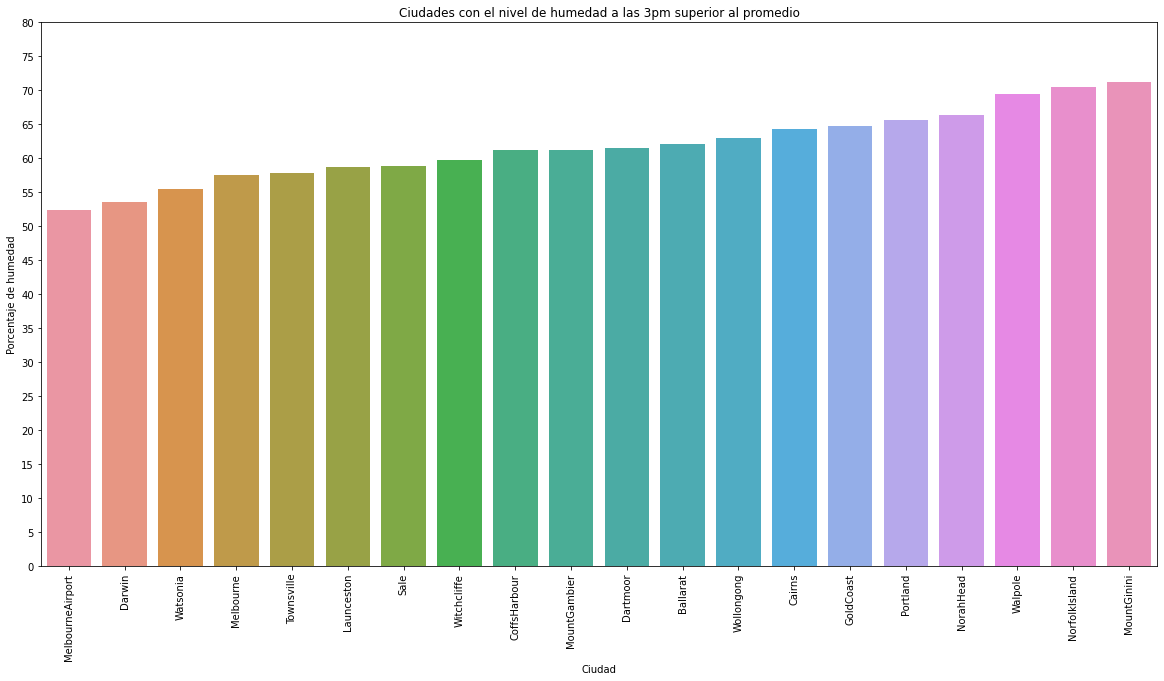

In [49]:
sns.barplot(x=filtro_pregunta_4.index, y=filtro_pregunta_4.humidity3pm)
plt.title("Ciudades con el nivel de humedad a las 3pm superior al promedio")
plt.xlabel("Ciudad")
plt.ylabel("Porcentaje de humedad")
plt.yticks(range(0,85,5));
plt.xticks(rotation=90)  
plt.gcf().set_size_inches(20, 10)

## Información y conocimiento útil obtenido (patrones, tendencias)

+ CoffsHarbour, MountGambier, Dartmoo presentan un nivel de humedad igual a 61%
+ El 40% de las ciudades presenta un nivel de humedad inferior a 60%